In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from operator import attrgetter
import scipy.stats as st
import matplotlib.ticker as mtick

from matplotlib.colors import LinearSegmentedColormap

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')

In [3]:
# checking for nulls in rows
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [4]:
# Overview of the dataset
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
# checking for nulls in rows
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [6]:
# Overview of the dataset
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [7]:
# converting 'shipping_limit_date' column to datetime type
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

In [8]:
# verifying the command executed correctly
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [9]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [11]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [12]:
# converting the necessary columns to datetime type
orders[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']] = orders[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']].apply(pd.to_datetime)

In [13]:
# verifying the command executed correctly
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [14]:
# verifying the command executed correctly
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


## Task 1
Evaluate monthly retention in order placement using cohort analysis

In [15]:
# merging all datasets for further work
full_df = orders.merge(customers, on = 'customer_id')
full_df = full_df.merge(order_items, on = 'order_id')

In [16]:
full_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [17]:
# creating a copy of the dataset
retention = full_df[['order_id', 'customer_unique_id', 'order_status','order_purchase_timestamp']]

In [18]:
# since we need a complete user experience for analysis, we filter customers who have received their orders
retention = retention.query("order_status == 'delivered'")

In [19]:
# creating reference points for further calculations
retention['transaction_period'] = retention['order_purchase_timestamp'].dt.to_period('M')
retention['transaction_day'] = retention['order_purchase_timestamp'].dt.to_period('D')

In [20]:
# calculating the 0th cohort for each user
retention['cohort'] = retention.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')
retention['cohort_day'] = retention.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('D')

In [21]:
retention

,order_id,customer_unique_id,order_status,order_purchase_timestamp,transaction_period,transaction_day,cohort,cohort_day
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10,2017-10-02,2017-09,2017-09-04
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07,2018-07-24,2018-07,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08,2018-08-08,2018-08,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11,2017-11-18,2017-11,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02,2018-02-13,2018-02,2018-02-13
...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,da62f9e57a76d978d02ab5362c509660,delivered,2018-02-06 12:58:58,2018-02,2018-02-06,2018-02,2018-02-06
112646,83c1379a015df1e13d02aae0204711ab,737520a9aad80b3fbbdad19b66b37b30,delivered,2017-08-27 14:46:43,2017-08,2017-08-27,2017-08,2017-08-27
112647,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,delivered,2018-01-08 21:28:27,2018-01,2018-01-08,2018-01,2018-01-08
112648,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,delivered,2018-01-08 21:28:27,2018-01,2018-01-08,2018-01,2018-01-08


In [22]:
retention['period_number_month'] = np.floor((retention.transaction_day-retention.cohort_day).apply(attrgetter('n'))/30)

In [23]:
retention_cohort = retention.groupby(['cohort', 'period_number_month'], as_index = False).agg(n_customers =('customer_unique_id', 'nunique'))

In [24]:
retention_cohort = retention_cohort.pivot_table(index = 'cohort', columns = 'period_number_month', values = 'n_customers')

In [25]:
retention_cohort

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,262.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,1.0,1.0
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,717.0,2.0,NaN,4.0,1.0,1.0,2.0,2.0,NaN,NaN,...,4.0,3.0,2.0,NaN,2.0,2.0,2.0,1.0,NaN,NaN
2017-02,1628.0,2.0,3.0,6.0,4.0,2.0,4.0,1.0,2.0,4.0,...,6.0,1.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN,NaN
2017-03,2503.0,7.0,13.0,11.0,3.0,2.0,9.0,4.0,6.0,6.0,...,4.0,4.0,3.0,7.0,2.0,3.0,2.0,NaN,NaN,NaN
2017-04,2256.0,8.0,6.0,1.0,6.0,8.0,6.0,10.0,5.0,6.0,...,3.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
2017-05,3451.0,14.0,14.0,8.0,13.0,11.0,11.0,4.0,10.0,9.0,...,11.0,6.0,3.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN
2017-06,3037.0,13.0,15.0,11.0,5.0,16.0,9.0,6.0,4.0,10.0,...,9.0,3.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
retention_matrix = retention_cohort.divide(retention_cohort[0], axis = 0).round(4)

In [27]:
# calculating the median retention for the 1st month
first_month_median = retention_matrix[1].median()
print(f'Медиана retention 1-го месяца равняется {first_month_median}')

Медиана retention 1-го месяца равняется 0.0035


In [28]:
retention_matrix

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.0038,NaN,NaN,0.0038,...,0.0038,NaN,0.0038,NaN,0.0038,NaN,0.0038,0.0076,0.0038,0.0038
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.0028,NaN,0.0056,0.0014,0.0014,0.0028,0.0028,NaN,NaN,...,0.0056,0.0042,0.0028,NaN,0.0028,0.0028,0.0028,0.0014,NaN,NaN
2017-02,1.0,0.0012,0.0018,0.0037,0.0025,0.0012,0.0025,0.0006,0.0012,0.0025,...,0.0037,0.0006,0.0018,0.0012,0.0006,0.0006,0.0018,NaN,NaN,NaN
2017-03,1.0,0.0028,0.0052,0.0044,0.0012,0.0008,0.0036,0.0016,0.0024,0.0024,...,0.0016,0.0016,0.0012,0.0028,0.0008,0.0012,0.0008,NaN,NaN,NaN
2017-04,1.0,0.0035,0.0027,0.0004,0.0027,0.0035,0.0027,0.0044,0.0022,0.0027,...,0.0013,NaN,0.0009,0.0009,0.0009,0.0009,NaN,NaN,NaN,NaN
2017-05,1.0,0.0041,0.0041,0.0023,0.0038,0.0032,0.0032,0.0012,0.0029,0.0026,...,0.0032,0.0017,0.0009,0.0020,0.0012,NaN,NaN,NaN,NaN,NaN
2017-06,1.0,0.0043,0.0049,0.0036,0.0016,0.0053,0.0030,0.0020,0.0013,0.0033,...,0.0030,0.0010,0.0030,0.0013,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# since all obtained values differ significantly from the 'zero' cohort but are similar to each other, we exclude the zero cohort for better visual perception
retention_matrix_vis = retention_matrix.loc[:, retention_matrix.columns > 0]

In [30]:
# identifying the cohort with the highest retention in the 3rd month
max_cohort_third_month = retention_matrix[3].idxmax()
print(f'Когорта с самым высоким retention на 3-й месяц приходится на {max_cohort_third_month}')

Когорта с самым высоким retention на 3-й месяц приходится на 2017-01


In [31]:
# creating a custom palette
colors = ["#f9f4f5", "#e7cadb", "#d49dc7", "#ba6bb1", "#6a356a"]
custom_cmap = LinearSegmentedColormap.from_list("custom_purple", colors, N=256)


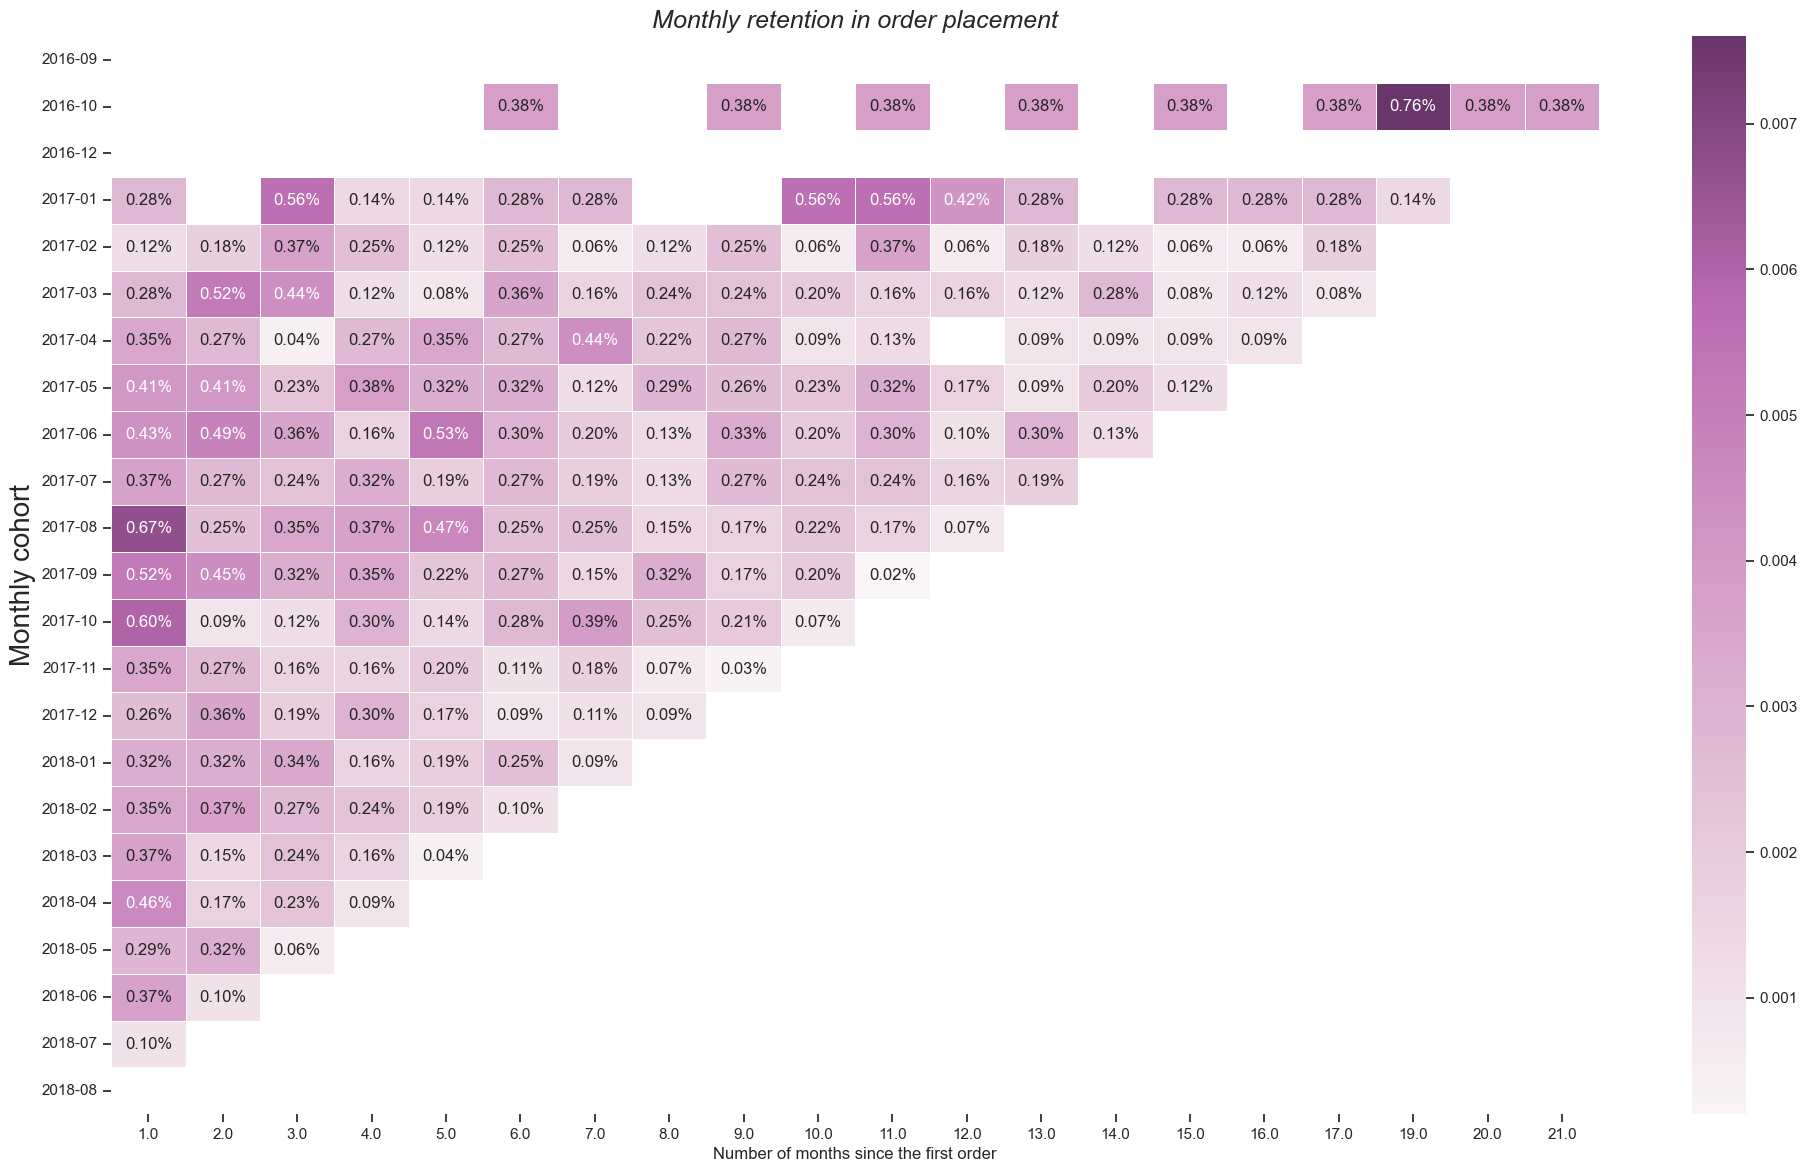

In [32]:
# plotting a heatmap
plt.figure(figsize=(24,14))
sns.set(style='ticks')
sns.heatmap(retention_matrix_vis, mask=retention_matrix_vis.isnull(), annot=True, fmt='.2%', cmap=custom_cmap, cbar=True, linewidths=0.5)
plt.title('Monthly retention in order placement', fontsize=18, fontstyle = 'italic')
plt.ylabel('Monthly cohort', fontsize = 20)
plt.xlabel('Number of months since the first order', fontsize = 12)
plt.show()

## Task 2. Determining whether the marketplace has product/market fit.

*Based on the results of the cohort analysis, the customer retention rate is below 1%, indicating extremely low engagement and repeat purchases. This suggests a lack of **product/market fit** at the current stage of the marketplace's development.*

*Since the cohort analysis includes only customers who actually received their orders, one possible reason for such a high churn rate could be a negative user experience during the order processing stage.*

In [33]:
# creating a df for further analysis
pmf_df = full_df[['order_id', 'order_item_id', 'customer_unique_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']]

In [34]:
# showing the number of rows to compare filtering
pmf_df.shape

(112650, 9)

In [35]:
# applying a filter
# we consider only customers who successfully completed the entire user experience
pmf_df = pmf_df.query("order_status == 'delivered'")

In [36]:
# displaying the number of rows to verify the applied filter
pmf_df.shape

(110197, 9)

*First, let's analyze the average time taken to confirm an order*

In [37]:
# creating a column for the time taken to confirm an order
pmf_df['approval_time'] = pmf_df['order_approved_at']-pmf_df['order_purchase_timestamp']
# converting to hours to check the average time by month
pmf_df['approval_time_hours'] = pmf_df['approval_time'].dt.total_seconds() / 3600

In [38]:
# looking at the overall average time taken to confirm an order across the entire dataframe
pmf_df['approval_time'].mean()

Timedelta('0 days 10:31:05.509983481')

*The average order confirmation time is 10.5 hours, which is excessively long. Prolonged processing may create uncertainty for users and reduce trust in the platform. This negative experience lowers the perceived value of the marketplace and makes it less competitive.*

In [39]:
# creating a column with months for further grouping
pmf_df['transaction_period'] = (pmf_df['order_purchase_timestamp'].dt.to_period('M'))

In [40]:
# checked the average time taken to confirm orders by month
# this helps identify any anomalous spikes
# it can be seen that the average order processing time remains consistent
monthly_avg_time = pmf_df.groupby('transaction_period', as_index =  False).agg(avg_hours=('approval_time_hours', 'mean')).round(2)

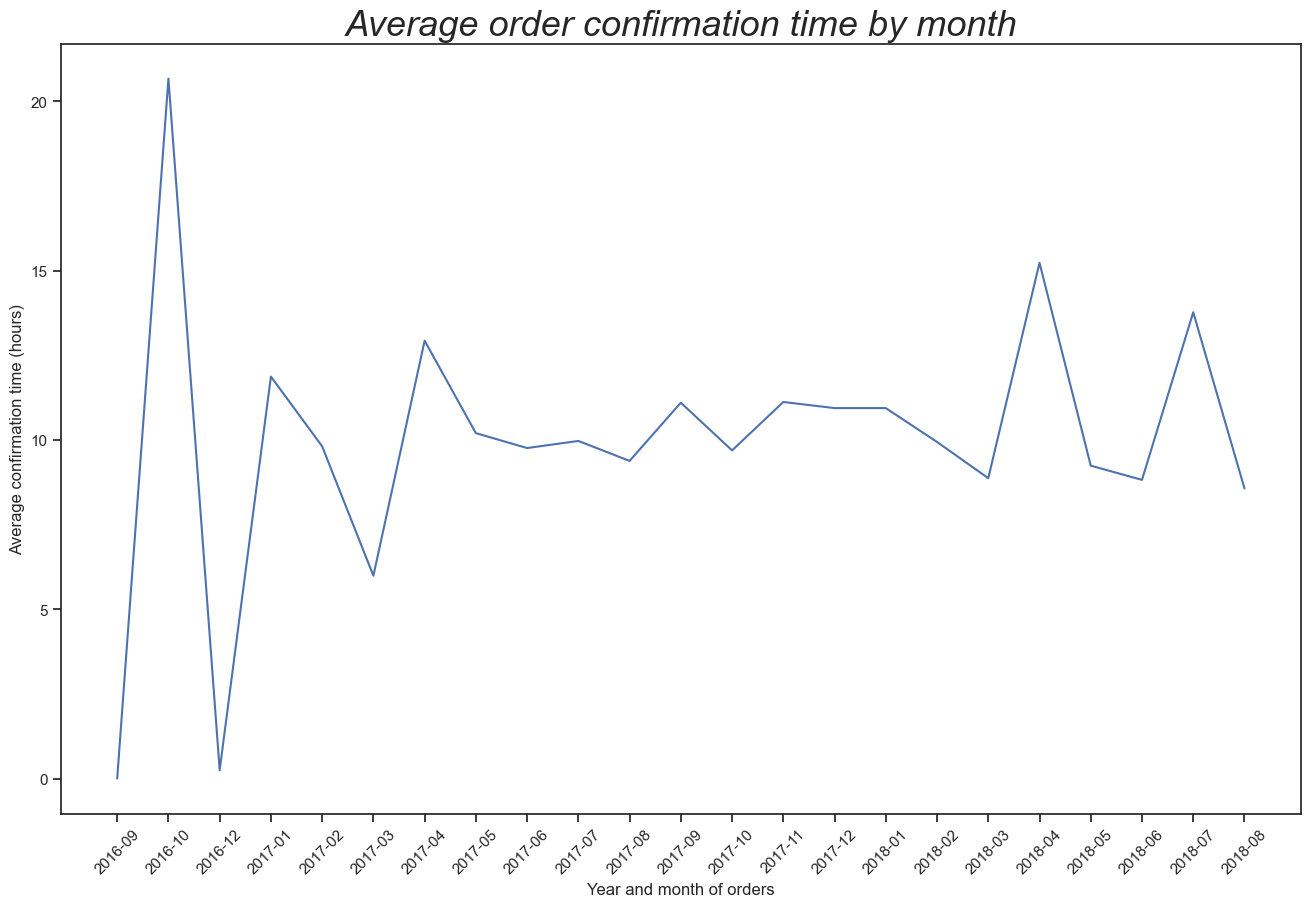

In [41]:
plt.figure(figsize=(16,10))
sns.lineplot(x = monthly_avg_time.transaction_period.astype(str), y = monthly_avg_time.avg_hours)
plt.title('Average order confirmation time by month', fontsize=18, fontstyle = 'italic')
plt.xlabel('Year and month of orders')
plt.ylabel('Average confirmation time (hours)')
plt.xticks(rotation=45)
plt.show()

The chart shows that the average order confirmation time remains consistently high throughout the observation period, except for two months — September and December 2016. It is possible that the prolonged order processing is one of the reasons for the low retention.


Based on the available data, let's try to identify the causes of order processing delays

In [42]:
# checking whether the time taken to confirm an order varies with the order quantity
product_num_time = pmf_df.groupby('order_id', as_index = False) \
                    .agg(num_of_items = ('order_item_id','count'),
                         avg_time = ('approval_time_hours', 'mean')) \
                    .sort_values('num_of_items', ascending = False)

In [43]:
product_num_time=product_num_time.loc[product_num_time['avg_time'].notna()]

In [44]:
# applying Pearson's test to determine the presence or absence of correlation
st.pearsonr(product_num_time.num_of_items, product_num_time['avg_time'])

PearsonRResult(statistic=np.float64(0.02492203997982132), pvalue=np.float64(9.821034705269977e-15))

In [45]:
product_num_time['avg_time'] = pd.to_timedelta(product_num_time['avg_time'], unit='h')

*Pearson correlation analysis revealed a statistically significant but extremely weak relationship between the number of items in an order and the time required to confirm it (correlation coefficient = 0.024). This indicates that an increase in the number of items in an order has virtually no impact on processing time and, therefore, is unlikely to explain the overall slowdown in order confirmation.*

In [46]:
# testing the hypothesis that order confirmation delays are due to manual processing during "working hours"
pmf_df['purchase_hour'] = pmf_df['order_purchase_timestamp'].dt.hour
pmf_df['approval_hour'] = pmf_df['order_approved_at'].dt.hour

In [47]:
pmf_df['purchase_hour'].value_counts().sort_index()

purchase_hour
0     2655
1     1264
2      575
3      299
4      242
5      213
6      533
7     1343
8     3337
9     5346
10    6881
11    7272
12    6661
13    7224
14    7415
15    7214
16    7479
17    6839
18    6390
19    6577
20    6733
21    6757
22    6399
23    4549
Name: count, dtype: int64

In [48]:
pmf_df['approval_hour'].value_counts().sort_index()

approval_hour
0.0     2186
1.0     1699
2.0     8089
3.0     6252
4.0     3762
5.0     1179
6.0     1035
7.0     1676
8.0     2506
9.0     4195
10.0    5334
11.0    5873
12.0    5082
13.0    6110
14.0    5980
15.0    5871
16.0    6607
17.0    6065
18.0    5545
19.0    5541
20.0    5367
21.0    5149
22.0    5200
23.0    3879
Name: count, dtype: int64

*The assumption that order confirmation delays might be related to processing only during operators’ working hours was not confirmed — orders are processed around the clock. This suggests that the high order confirmation time may be due to insufficient automation of the process.*

In addition to the prolonged order confirmation process, there are other stages in which the customer could have experienced a negative user experience. Specifically, we will analyze whether there were cases of delivery delays compared to the stated expected delivery date.

In [49]:
# calculating the difference between the expected delivery date and the actual delivery date
pmf_df['diff_est_delivery'] = pmf_df['order_estimated_delivery_date'] - pmf_df['order_delivered_customer_date']

In [50]:
# displaying the number of rows to verify duplicate removal
pmf_df.shape

(110197, 15)

In [51]:
# removing duplicates in the "order_id" column
deliveries = pmf_df.drop_duplicates(subset = 'order_id', keep = 'first')

In [52]:
# comparing the number of rows with the previous step to check if duplicates were removed
deliveries['order_id'].value_counts().reset_index().sort_values('order_id', ascending=False)

,order_id,count
57964,fffe41c64501cc87c801fd61db3f6244,1
58088,fffe18544ffabc95dfada21779c9644f,1
51143,fffce4705a9662cd70adb13d4a31832d,1
68061,fffcd46ef2263f404302a634eb57f7eb,1
77180,fffc94f6ce00a00581880bf54a75a037,1
...,...,...
5097,00042b26cf59d7ce69dfabb4e55b4fd9,1
21894,00024acbcdf0a6daa1e931b038114c75,1
6119,000229ec398224ef6ca0657da4fc703e,1
69720,00018f77f2f0320c557190d7a144bdd3,1


In [53]:
# calculating the average delivery time
deliveries['diff_est_delivery'].mean()
# on average, items were delivered earlier than the expected date

Timedelta('11 days 04:16:30.062972944')

In [54]:
late_deliveries = deliveries.query("order_delivered_customer_date>order_estimated_delivery_date	")

In [55]:
# calculating the proportion of late deliveries out of all created orders
late_deliveries.shape[0]/deliveries.shape[0]

0.08111693857667032

In [56]:
deliveries['is_late'] = deliveries.apply(lambda x: 'late' if x['order_delivered_customer_date'] > x['order_estimated_delivery_date'] else 'not_late', axis =1)

/var/folders/tx/541j6m6x6qz6p0d_k_m7q4800000gn/T/ipykernel_4517/3057265033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deliveries['is_late'] = deliveries.apply(lambda x: 'late' if x['order_delivered_customer_date'] > x['order_estimated_delivery_date'] else 'not_late', axis =1)


In [57]:
deliveries.query("is_late == 'late'")

,order_id,order_item_id,customer_unique_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approval_time,approval_time_hours,transaction_period,purchase_hour,approval_hour,diff_est_delivery,is_late
21,203096f03d82e0dffbc41ebc2e2bcfb7,1,d699688533772c15a061e8ce81cb56df,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,0 days 13:32:39,13.544167,2017-09,14,4.0,-12 days +01:36:14,late
26,fbf9ac61453ac646ce8ad9783d7d0af6,1,a25d5f94840d3c6a1a49f271ed83f4ec,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,1 days 02:43:53,26.731389,2018-02,23,2.0,-10 days +01:56:06,late
37,8563039e855156e48fccee4d611a3196,1,92fd8aa5948e20c43a014c44c025c5e1,delivered,2018-02-17 15:59:46,2018-02-17 16:15:34,2018-02-20 23:03:56,2018-03-20 00:59:25,2018-03-20,0 days 00:15:48,0.263333,2018-02,15,16.0,-1 days +23:00:35,late
43,6ea2f835b4556291ffdc53fa0b3b95e8,1,3e4fd73f1e86b135b9b121d6abbe9597,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,0 days 02:53:21,2.889167,2017-11,21,0.0,-8 days +05:00:37,late
60,66e4624ae69e7dc89bd50222b59f581f,1,ddf60e20e6e262e2136801ce5cd628b0,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,0 days 00:50:24,0.840000,2018-03,14,15.0,-2 days +10:31:14,late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112602,b3112ca67f3afd4e20cf2ee91fc4f804,1,f690f0caffab80b6f849f08ba1692925,delivered,2018-08-02 22:46:54,2018-08-02 23:04:06,2018-08-15 17:42:00,2018-08-21 00:03:26,2018-08-16,0 days 00:17:12,0.286667,2018-08,22,23.0,-6 days +23:56:34,late
112604,0fa1fab1d7c1211c824596ed5e111e3c,1,4b855cb19adce3763ce1af3acc2aae0b,delivered,2018-03-13 21:48:57,2018-03-13 22:40:28,2018-03-14 19:27:23,2018-04-05 19:59:49,2018-04-02,0 days 00:51:31,0.858611,2018-03,21,22.0,-4 days +04:00:11,late
112630,38e9133ce29f6bbe35aed9c3863dce01,1,a3983b8b6b679c9f645e6ef9517ac98d,delivered,2017-10-12 20:54:11,2017-10-14 03:28:24,2017-10-17 17:04:42,2017-11-21 17:06:59,2017-10-31,1 days 06:34:13,30.570278,2017-10,20,3.0,-22 days +06:53:01,late
112632,d692ef54145c9cb3322ec2e5508aa3f4,1,397cd1affbb66fa8f76e8ac24685440a,delivered,2018-03-21 19:47:18,2018-03-21 20:05:26,2018-03-22 21:11:58,2018-04-11 00:48:31,2018-04-09,0 days 00:18:08,0.302222,2018-03,19,20.0,-3 days +23:11:29,late


In [58]:
deliveries.query("is_late == 'late'")['diff_est_delivery'].mean()

Timedelta('-10 days +10:45:26.560695119')

In [59]:
late = deliveries['is_late'].value_counts()

In [60]:
late

is_late
not_late    88652
late         7826
Name: count, dtype: int64

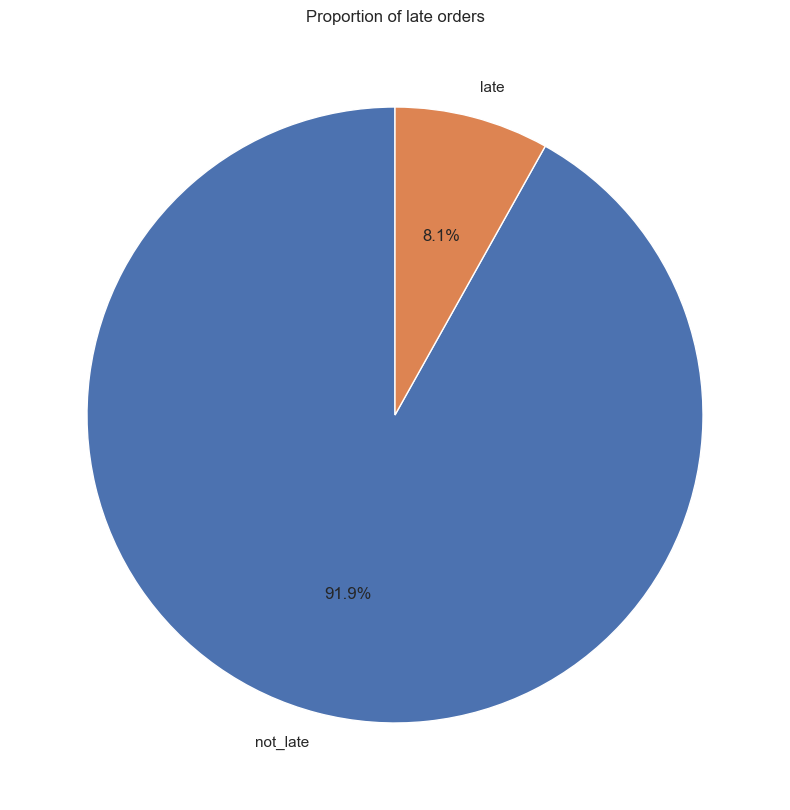

In [61]:
plt.figure(figsize=(10, 10))
plt.pie(late, labels=late.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of late orders')
plt.show()

In most cases, deliveries occurred earlier than the expected date — on average by 11 days. The proportion of late orders was only 8.1%, but the average delay for these late orders was 10 days, which is a critical indicator.

### Let's analyze the average delivery time

In [62]:
pmf_df['delivery_time'] = pmf_df['order_delivered_customer_date']-pmf_df['order_approved_at']

In [63]:
pmf_df['delivery_time'].mean()

Timedelta('12 days 00:48:45.224018371')

The average order delivery time in Brazil is over 12 days. However, to objectively assess this figure, it is necessary to compare it with the average delivery time across the country. Such a comparison will help determine whether the observed value is normal for the region or indicates potential logistics issues.

### Conclusions:
The possible reason for the lack of Product/Market Fit is a negative user experience. On average, order confirmation takes 10.5 hours, and delivery across the country takes more than 11 days. These factors may lead to reduced customer satisfaction with the marketplace, lower perceived platform value, and difficulty in building a loyal customer base.

## Task 3. Identify 5 key metrics for the product manager to focus on in order to maximize company profit.

You have analyzed the presence of product/market fit. Now you are asked to formulate product metrics for the marketplace so that the company can focus on them.
First, it is necessary to:
Identify 5 key metrics that the product manager can focus on to maximize company profit.
- **The first** metric should reflect the growth of the marketplace’s sales volume.
- **The second** should show the size of the audience that the product delivers value to.
- **The third** should reflect the interest of new customers in the product (even if you cannot calculate it with the data you currently have).
- **The fourth** should reflect customer engagement in continued product use.
- **The fifth** should express customer engagement in monetary terms.

In [64]:
full_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


### 1. Gross Merchandise Volume (GMV)

In [65]:
# we exclude canceled orders, since revenue comes only from delivered orders
# grouping by months to track sales growth
monthly_gmv = full_df.query("order_status == 'delivered'") \
                     .groupby(full_df['order_purchase_timestamp'].dt.to_period('M'))['price'].sum() \
                     .reset_index()

In [66]:
# checking df
monthly_gmv

,order_purchase_timestamp,price
0,2016-09,134.97
1,2016-10,40325.11
2,2016-12,10.90
3,2017-01,111798.36
4,2017-02,234223.40
5,2017-03,359198.85
6,2017-04,340669.68
7,2017-05,489338.25
8,2017-06,421923.37
9,2017-07,481604.52


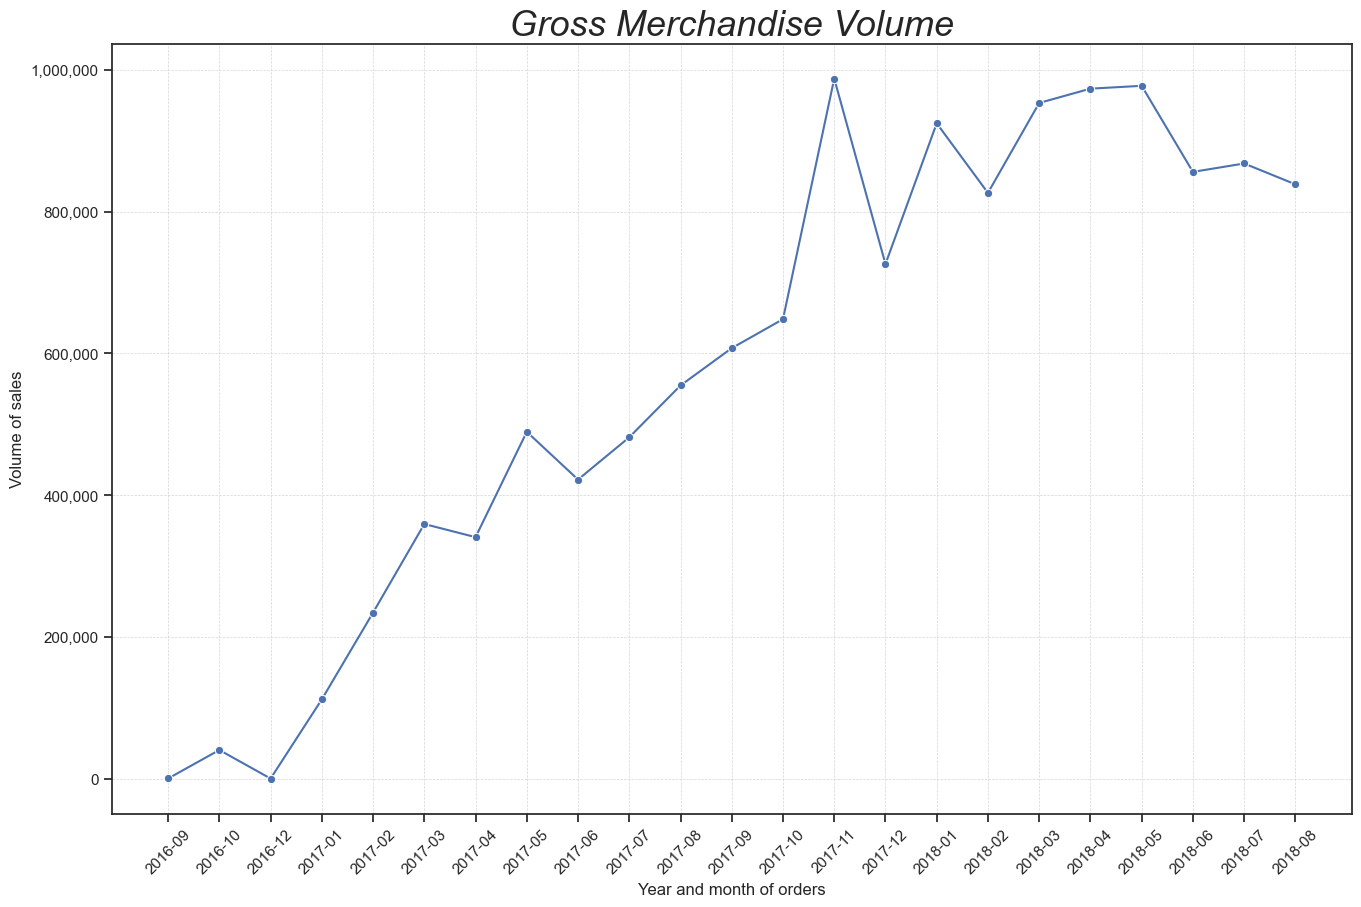

In [67]:
# plotting a chart to track the sales growth trend
plt.figure(figsize=(16,10))
plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.8)
gmv_graph = sns.lineplot(x = monthly_gmv.order_purchase_timestamp.astype(str), y = monthly_gmv.price, marker='o')
plt.xticks(rotation=45)
plt.title('Gross Merchandise Volume', fontsize=26, fontstyle = 'italic')
plt.xlabel('Year and month of orders')
plt.ylabel('Volume of sales')
gmv_graph.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))


The chart shows that, overall, sales volume is growing; however, the trend is not stable throughout the period. There are sharp spikes (for example, in December 2016, sales increased from 10k to 111k) as well as significant drops (after November 2017, sales fell sharply from 987k to 726k).

### 2. Metric for the audience size receiving value from the product

In [68]:
# we can assess the product’s value through customers who have made more than one order
success_customers  = full_df.query("order_status=='delivered'")[['customer_unique_id','order_id']]

In [69]:
success_customers = success_customers.groupby('customer_unique_id', as_index = False) \
                           .agg(num_of_orders = ('order_id', 'nunique'))

In [70]:
repeat_ratio = round(((success_customers.query('num_of_orders > 1').shape[0]) /success_customers.shape[0]),2)
print(f'Proportion of customers who made a repeat purchase is {repeat_ratio*100}%')

Proportion of customers who made a repeat purchase is 3.0%


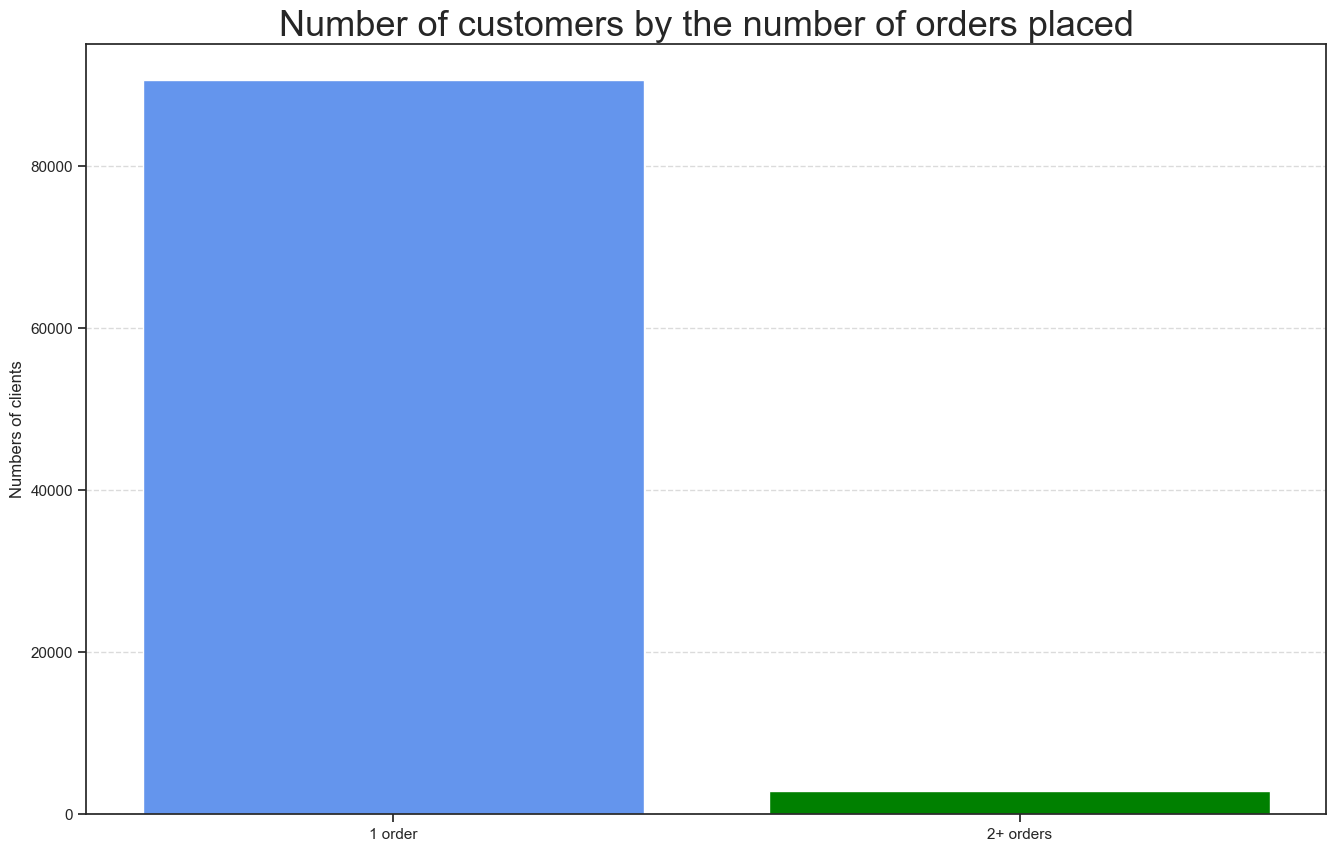

In [71]:
# plotting a chart: customers who made one order vs. customers who made 2 or more orders
once = (success_customers['num_of_orders'] == 1).sum()
repeat = (success_customers['num_of_orders'] > 1).sum()

plt.figure(figsize = (16, 10))
plt.bar(['1 order', '2+ orders'], [once, repeat], color=['cornflowerblue', 'green'])
plt.title('Number of customers by the number of orders placed', fontsize = 26)
plt.ylabel('Numbers of clients')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The proportion of customers who made a repeat purchase is only 3.0%. This indicates that a significant portion of users does not find enough value in our product to return and make additional purchases.

### 3. Metric for new user engagement

New user engagement with the product could be assessed using the following metrics:

- **Average time spent on the site** — the longer a user stays, the higher the likelihood of interest.

- **Navigations to internal pages**, beyond the homepage, indicate a desire to learn more about the product.

- **Number of mobile app installs (if available)** — can serve as an indicator of engagement and interest.

- **CTR (Click-Through Rate)** — clicks on ads indicate that the offer captured the user’s attention.



### 4. Customer engagement metric

In [72]:
# creating a dataframe with the necessary columns and filtering only customers who successfully received their orders
rfm = full_df.query("order_status == 'delivered'")[['order_purchase_timestamp', 'customer_unique_id', 'order_id', 'price']]

In [73]:
rfm['order_purchase_timestamp'] = rfm['order_purchase_timestamp'].dt.normalize()

In [74]:
# calculating the last purchase date in this dataframe
last_day = rfm['order_purchase_timestamp'].max()
print(last_day)

2018-08-29 00:00:00


In [75]:
recency = (last_day - rfm.groupby('customer_unique_id').agg(recency = ('order_purchase_timestamp','max'))).reset_index()
recency['recency'] = recency['recency'].dt.days
recency

,customer_unique_id,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114
2,0000f46a3911fa3c0805444483337064,537
3,0000f6ccb0745a6a4b88665a16c9f078,321
4,0004aac84e0df4da2b147fca70cf8255,288
...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,447
93354,fffea47cd6d3cc0a88bd621562a9d061,262
93355,ffff371b4d645b6ecea244b27531430a,568
93356,ffff5962728ec6157033ef9805bacc48,119


In [76]:
# checking
rfm[rfm['customer_unique_id']=='0000f46a3911fa3c0805444483337064'].order_purchase_timestamp.max()

Timestamp('2017-03-10 00:00:00')

In [77]:
# determining frequency
frequency = rfm.groupby('customer_unique_id').agg(frequency = ('order_id', 'nunique')).reset_index()
frequency

,customer_unique_id,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,1
93354,fffea47cd6d3cc0a88bd621562a9d061,1
93355,ffff371b4d645b6ecea244b27531430a,1
93356,ffff5962728ec6157033ef9805bacc48,1


In [78]:
# verifying whether the formula calculated correctly
rfm[rfm['customer_unique_id']=='0000f46a3911fa3c0805444483337064'].order_id.nunique()

1

In [79]:
# determining monetary
monetary = rfm.groupby('customer_unique_id').agg(monetary = ('price', 'sum')).reset_index()
monetary

,customer_unique_id,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
2,0000f46a3911fa3c0805444483337064,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,25.99
4,0004aac84e0df4da2b147fca70cf8255,180.00
...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,1570.00
93354,fffea47cd6d3cc0a88bd621562a9d061,64.89
93355,ffff371b4d645b6ecea244b27531430a,89.90
93356,ffff5962728ec6157033ef9805bacc48,115.00


In [80]:
# verifying whether the formula calculated correctly
rfm[rfm['customer_unique_id']=='fffcf5a5ff07b0908bd4e2dbc735a684'].price.sum()

np.float64(1570.0)

In [81]:
rfm_df = recency.merge(frequency, on = 'customer_unique_id')
rfm_df = rfm_df.merge(monetary, on = 'customer_unique_id')

In [82]:
rfm_df.describe().round(2)

,recency,frequency,monetary
count,93358.00,93358.00,93358.00
mean,237.48,1.03,141.62
std,152.60,0.21,215.69
min,0.00,1.00,0.85
25%,114.00,1.00,47.65
50%,218.00,1.00,89.73
75%,346.00,1.00,154.74
max,713.00,15.00,13440.00


In [83]:
# checking if everything is working correctly
rfm.query("customer_unique_id=='b38211bd797f4fdd81a98b9d1754b606'")

,order_purchase_timestamp,customer_unique_id,order_id,price
94240,2018-04-24,b38211bd797f4fdd81a98b9d1754b606,6e864b3f0ec71031117ad4cf46b7f2a1,0.85


In [84]:
# checking if everything is working correctly
rfm_df.query('monetary == 0.85')

,customer_unique_id,recency,frequency,monetary
65551,b38211bd797f4fdd81a98b9d1754b606,127,1,0.85
78899,d80730c15c647bc8f2ad77c908ba5ca9,127,1,0.85


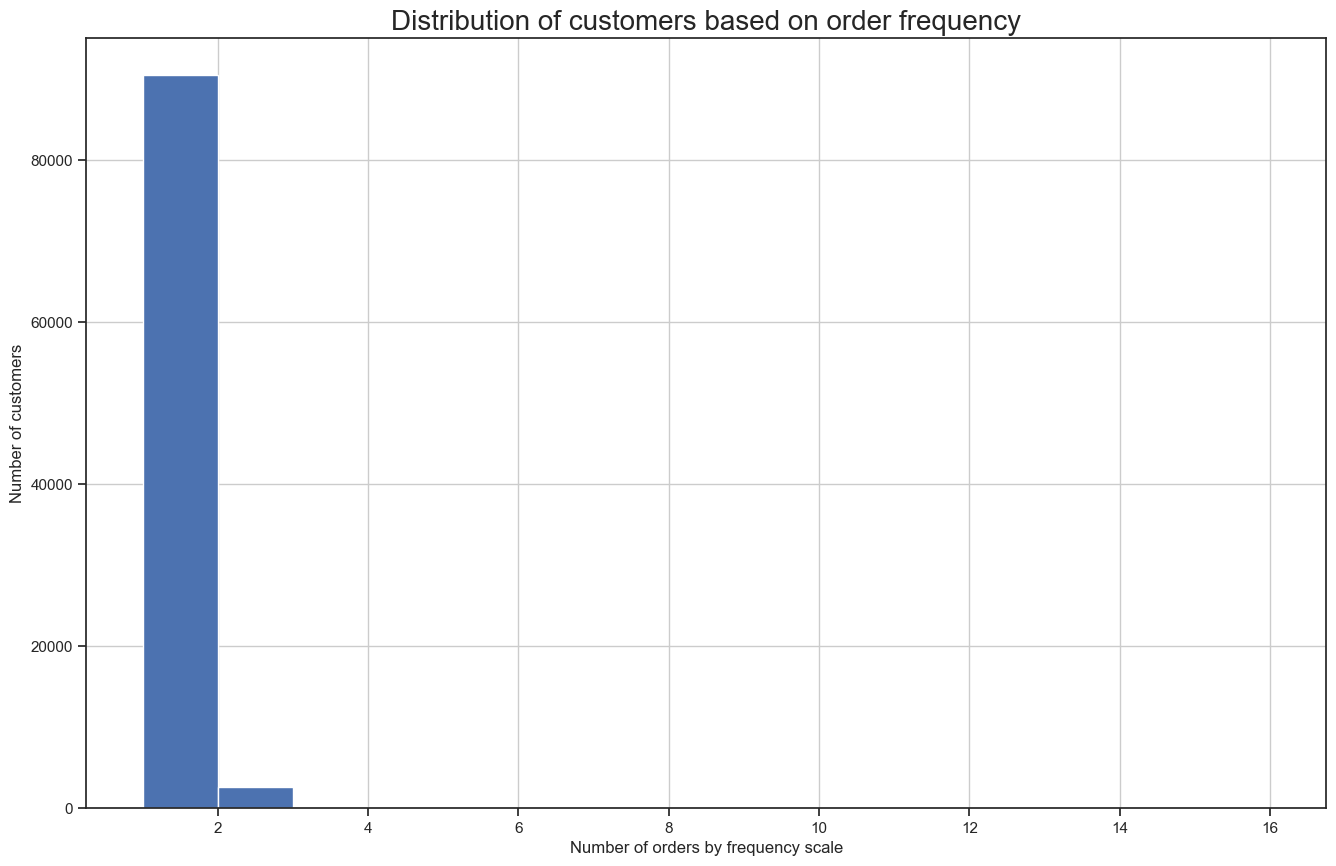

In [85]:
# plotting a chart
plt.figure(figsize=(16,10))
rfm_df['frequency'].hist(bins=range(1, rfm_df['frequency'].max()+2))
plt.title('Distribution of customers based on order frequency', fontsize=20)
plt.xlabel('Number of orders by frequency scale')
plt.ylabel('Number of customers')
plt.grid(True)
plt.show()

The metric reflecting customer engagement in continued product usage is purchase frequency (frequency), calculated as part of the RFM analysis. The analysis showed that the average order frequency is approximately **1**, indicating a very low level of customer engagement with our product. Customers whose expectations from using the service were not met are not interested in continuing to use it. Moreover, when calculating the metric for the audience volume that derives value from the product, we found that only **3%** of users make repeat purchases, which confirms the conclusions of the RFM analysis.

### 5. Monetary engagement metric

In [86]:
print(f"Minimum check is {rfm_df['monetary'].min()}")
print(f"Mean is  {rfm_df['monetary'].mean().round(2)}")
print(f"Median is {rfm_df['monetary'].median()}")
print(f"Maximum check is {rfm_df['monetary'].max()}") #избавились от редких и аномальных больших сумм

Minimum check is 0.85
Mean is  141.62
Median is 89.73
Maximum check is 13440.0


In [87]:
# count of occurrences of the minimum value
rfm_df.query('monetary==0.85')

,customer_unique_id,recency,frequency,monetary
65551,b38211bd797f4fdd81a98b9d1754b606,127,1,0.85
78899,d80730c15c647bc8f2ad77c908ba5ca9,127,1,0.85


In [88]:
# count of occurrences of the maximum value
rfm_df.query('monetary==13440.0')

,customer_unique_id,recency,frequency,monetary
3724,0a0a92112bd4c708ca5fde585afaa872,334,1,13440.0


In [89]:
# excluding outliers to obtain a more accurate estimate of the average order value
lower_quantile = rfm_df['monetary'].quantile(0.01)
upper_quantile = rfm_df['monetary'].quantile(0.99)

In [90]:
rfm_df = rfm_df.loc[(rfm_df['monetary']>lower_quantile) & (rfm_df['monetary']<upper_quantile)]

In [91]:
print(f"Minimum check is{rfm_df['monetary'].min()}")
print(f"Mean is {rfm_df['monetary'].mean().round(2)}")
print(f"Median is {rfm_df['monetary'].median().round(2)}")
print(f"Maximum check is {rfm_df['monetary'].max()}")

Minimum check is12.06
Mean is 127.84
Median is 89.79
Maximum check is 1001.0


Text(0, 0.5, 'Number of clients')

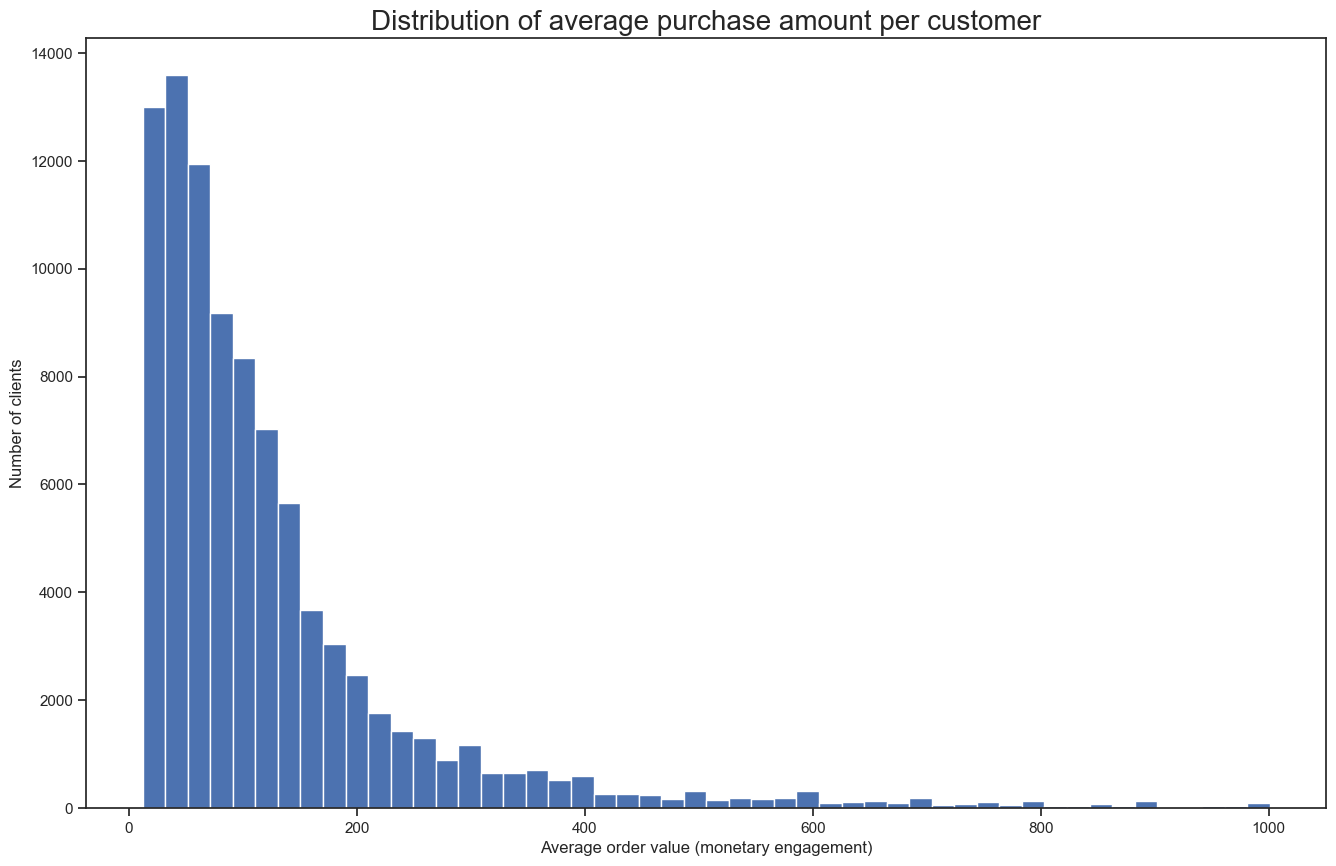

In [92]:
# plotting a chart
plt.figure(figsize=(16,10))
plt.hist(rfm_df['monetary'], bins=50)
plt.title('Distribution of average purchase amount per customer', fontsize = 20)
plt.xlabel('Average order value (monetary engagement)')
plt.ylabel('Number of clients')


As a measure of monetary engagement, we used the Monetary scale from the RFM analysis. After excluding outliers, it became evident that the majority of customers spend less than 200, with an average value of 127.84 and a maximum of 1004.99. Such a spread and significant skew towards lower values may indicate low monetary engagement. However, for a more accurate interpretation, we lack data on the product segment and pricing policy, which are necessary to assess whether this purchase amount is typical or below average for the product in question. 

## Task 4. Choose one of the three main hypotheses using the ICE framework..
After reviewing cohort analysis and metrics with the product team, you decided that the product needs to be changed. Metrics need to be urgently improved. Together with the team, you formulated three hypotheses that you believe in. For each hypothesis, the team has already filled in the **Ease** and **Confidence** scores. Your task is to fill in the most important score — **Impact**. To do this, you need to:

Choose one of the three main hypotheses using the ICE framework. These hypotheses were formulated by the product team and are expected to improve the user experience on the marketplace.

For calculating Impact, use data from June 2017. Assume that the conversion to a repeat purchase equals the median retention in the first month (see point 1 of the project).

### Hypothesis 1:
If we fix the bug in the order processing system, customers will no longer face order cancellations, which will lead to an increase in the number of successfully delivered orders. We assume that this will eliminate all cancellations.

In [93]:
# filter data by the selected reporting point and cancellations
hip_1 = full_df.query("order_status == 'canceled' & order_purchase_timestamp >= '2017-06-01'")

In [94]:
# exclude duplicate orders
hip_1 = hip_1.groupby('customer_id').agg(num_of_orders = ('order_id', 'nunique')).reset_index()

In [95]:
# count the number of canceled orders
impact_1 = hip_1.shape[0]
impact_1

373

In [96]:
# assign a score according to the Impact scale
impact_1_score = 4

## Hypothesis 2

If we reduce the order fulfillment time, customers will no longer receive their orders late, which will lead to an increase in the number of orders due to repeat purchases.

In [97]:
# filter data by the selected reporting point and cancellations
hip_2 = full_df.query('order_purchase_timestamp >= "2017-06-01" & order_status =="delivered"')

In [98]:
# filter orders with delay
hip_2 = hip_2.query('order_delivered_customer_date > order_estimated_delivery_date')

In [99]:
# exclude duplicate orders
hip_2 = hip_2.groupby('customer_id').agg(num_of_orders = ('order_id', 'nunique')).reset_index()

In [100]:
# multiply repeat purchase conversion by the number of users
impact_2 = first_month_median * hip_2.shape[0]
impact_2

np.float64(25.5325)

In [101]:
# assign a score according to the Impact scale
impact_2_score = 1

### Hypothesis 3
If we create a new payment method that converts customers into repeat purchases, customers will not face difficulties when placing an order, which will lead to an increase in the number of orders due to repeat purchases from those who previously did not make repeat orders.

In [102]:
# filter data by the selected reporting point and cancellations
hip_3 = full_df.query('order_purchase_timestamp >= "2017-06-01" & order_status =="delivered"')

In [103]:
# exclude duplicate orders
hip_3 = hip_3.groupby('customer_id').agg(num_of_orders = ('order_id', 'nunique')).reset_index()

In [104]:
# filter customers who made only one order
hip_3 = hip_3.query('num_of_orders == 1')

In [105]:
# multiply repeat purchase conversion by the number of users
impact_3 = hip_3.shape[0]*first_month_median
impact_3

np.float64(298.9455)

In [106]:
# assign a score according to the Impact scale
impact_3_score = 3

In [107]:
# create a DataFrame with ICE scores
data_ice = {
     'Гипотезы': ['Гипотеза 1', 'Гипотеза 2', 'Гипотеза 3'],
     'Impact': [impact_1_score, impact_2_score, impact_3_score],
     'Confidence': [8,10,5],
     'Ease': [6,4,9]
}

In [108]:
ICE = pd.DataFrame(data_ice)

In [109]:
# calculate ICE for all hypotheses
ICE['ICE'] = ICE['Impact']*ICE['Confidence']*ICE['Ease']

In [110]:
ICE

,Гипотезы,Impact,Confidence,Ease,ICE
0,Гипотеза 1,4,8,6,192
1,Гипотеза 2,1,10,4,40
2,Гипотеза 3,3,5,9,135


According to the ICE framework prioritization analysis, **the first hypothesis** scored the highest. Therefore, it is recommended to start working on improving the metrics with this hypothesis.

## Task 5. Define the metrics that your hypothesis should impact.

Following the previous research, you have formulated a hypothesis that can be implemented to significantly improve the company’s metrics. You suggested using A/B testing to evaluate its effectiveness.

### The product manager asked you to:
- Define the metrics that the selected hypothesis should impact.
- Formulate at least one metric for each category: target, proxy, and guardrail, and explain your choice.

**Target metric:** The metric that directly reflects the impact of the hypothesis is the share of successfully delivered orders. If the problem with order cancellations was caused by a bug in the system, fixing it should lead to an increase in the share of delivered orders.

**Proxy metrics:**
- **Average time required to confirm an order.** If the bug was slowing down the order processing, after fixing it, the time between order creation and confirmation should decrease.
- **Number of support requests regarding cancellations.** It is expected that successful implementation of the hypothesis will significantly reduce the number of such requests.
- **Share of canceled orders.** Although the target metric is the share of successfully delivered orders, it is also important to monitor the share of canceled orders.

**Guardrail metric:** The share of orders that were created but did not reach the payment stage. Fixing a bug in one part of the system could unintentionally disrupt another step of the order processing workflow.

## Task 6. Your first stage as an analyst in the marketplace team has come to an end. Now you need to share the results of your work with the company.

1. Formulate conclusions about the work done and prepare a small, but logical and informative report for Petya. Present it in comments in the .ipynb file or in the description of the merge request.

2. The structure should be as follows:
- Product problem formalization: What is wrong and how did you identify it?
- General conclusions based on the research from tasks 1–5.
- Product recommendations.

### Product problem formalization

Based on cohort analysis and the study of key metrics, significant issues in the user experience have been identified. Retention across all cohorts does not exceed 1%, and the share of repeat orders is only 3%. This indicates that the marketplace does not provide sufficient value to users and does not meet their expectations.

Additionally, the analysis revealed that the average order confirmation time is high at 10.5 hours, and the share of delayed orders is 8.1%, with an average delay of approximately 10 days. All of this points to significant failures in the marketplace system, which in turn undermines trust and reduces customer loyalty.

One possible cause of system failure is a bug that automatically cancels created orders.

### General conclusions

- **Only a few users make repeat purchases.** Less than 1% of users return to the platform, and only 3% place repeat orders. This signals a weak user experience and a lack of product value for users after their first purchase.
- **Trust in the platform is undermined by delays and long order processing times.** Order confirmation takes on average 10.5 hours. At the same time, 8% of orders are delayed, with an average delay of approximately 10 days from the expected delivery date. This is a critical issue. Users are unwilling to wait and are unsure about the reliability of the service.
- **Most customers make small orders.** The average order value is 127.84, while the maximum recorded is 1004.99 and the minimum is 12.06. Outliers were excluded for a more objective interpretation, although the median and mean values do not differ significantly. These values may indicate that users are reluctant to spend large amounts on the platform. However, this assumption requires further verification. At this stage, information about product segments available on the marketplace is lacking. It is possible that the assortment is initially aimed at a mid-price segment, which explains the moderate average order value.

- **Hypothesis prioritization using the ICE framework.** During the analysis, three hypotheses were proposed that could potentially improve product metrics. The ICE analysis showed that the primary focus should be on fixing bugs in the platform system that lead to order cancellations. Implementing this hypothesis is expected to completely eliminate system-caused order cancellations. The following metrics were chosen to test this hypothesis:
  - **Target metric:** Share of successfully delivered orders
  - **Proxy metrics:** Average confirmation time, number of support requests related to order cancellations
  - **Guardrail metric:** Share of orders that were created but did not reach the payment stage


### Product recommendations
- **Focus on the first customer experience.** Given the low retention and small share of repeat orders, it is important to enhance the value of the first interaction with the product. For example, after receiving an order, ask customers to rate the quality of the service. If a customer is dissatisfied with the marketplace experience, offer them a gift card equivalent to their order amount for use on their next purchase. This will help restore trust and encourage repeat purchases. It is also important to monitor the situation: if needed, involve support staff to understand the real reason for the negative feedback and prevent potential abuse.
- **Identify and eliminate the cause of long order confirmation times.** Currently, order confirmation takes more than 10 hours on average — a high value for an online platform. Such delays can create anxiety and a sense of instability for customers, especially if the payment has been processed but the confirmation is still pending. This, in turn, reduces the likelihood of repeat purchases.
- **Analyze the causes of product delivery delays.** Although the share of delayed orders is 8%, the average delay is almost 10 days. It is necessary to identify the stages where failures occur. Additionally, communication via email and SMS can be implemented to inform customers about delivery status. In case of delays — proactively apologize and offer a discount on the next purchase as compensation. This helps mitigate negative experiences and increases the likelihood of repeat orders.
- **Use A/B testing to evaluate the hypothesis selected via the ICE framework.** The implementation of this hypothesis aims to eliminate system errors that lead to order cancellations. A/B testing will allow for an objective assessment of its impact on key metrics — share of successfully delivered orders, average order confirmation time, and share of created orders that were not paid. This approach minimizes risks and enables informed decisions regarding further implementation.
- **Investigate the reasons for the low average order value in more detail.** Further analysis of the product assortment and user behavior is needed to determine whether the low average order value is due to customer mistrust or characteristics of the product offering. This will help identify ways to increase the average order value and overall revenue.